<a href="https://colab.research.google.com/github/AVJdataminer/AVJdataminer.github.io/blob/master/Cars_exercise_for_exponent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Loading, Data Wrangling, and Quality Checks

#### Which Vehicle should we add to our fleet?

You are a data scientist at a used vehicle dealer and your manager wants to know which vehicles are most likely to have a higher four-year resale value. You have access to a vehicle data set with many attributes associated with valuation. We can build a predictive model to determine which vehicles have higher 4-year resale values. As is often the case we need to perform pre-processing steps to handle the data before we are ready to build our predictive model. 

## **Data Loading**

**Load the python modules and mount the data drive.**

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import datetime
from google.colab import drive
#drive.mount('/content/drive')

In [10]:
#load the data
file='https://drive.google.com/uc?export=download&id=1PigHCsGrqy8IP3NthEfOa95ly1Gbwp7D'
df=pd.read_csv(file)
df.head()

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch,Region
0,Acura,Integra,16.92,16.36,Passenger,21.50,1.8,140,101.2,67.3,172.4,2.64,13.2,28.0,2-Feb-14,Japanese
1,Acura,TL,39.38,19.88,Passenger,28.40,3.2,225,108.1,70.3,192.9,3.52,17.2,25.0,6-Mar-15,Japanese
2,Acura,CL,14.11,18.23,Passenger,NaN,3.2,225,106.9,70.6,192.0,3.47,17.2,26.0,1-Apr-14,Japanese
3,Acura,RL,8.59,29.73,Passenger,42.00,3.5,210,114.6,71.4,196.6,3.85,18.0,22.0,3-Oct-15,Japanese
4,Audi,A4,20.40,22.26,Passenger,23.99,1.8,150,102.6,68.2,178.0,3.00,16.4,27.0,10-Aug-15,European


## Data Wrangling

#### Missing and NA Values: Data Science Knowledge Question
How should we handle the NA values in this cars dataset?  

Please include how we decide what to do with the missing data as well as what additional information we may want to review or consider in the process. 

Use the below code snippet and its results to help you. * Note: it may not be the correct solution.

In [3]:
print(df.shape)
print(pd.DataFrame(df.isnull().sum().sort_values(ascending=False)))
df = df.dropna(axis=1)
print(df.shape)
print(df.columns)

(156, 16)
                      0
4-year resale value  36
Fuel efficiency       2
Curb weight           1
Price in thousands    1
Region                0
Latest Launch         0
Fuel capacity         0
Length                0
Width                 0
Wheelbase             0
Horsepower            0
Engine size           0
Vehicle type          0
Sales in thousands    0
Model                 0
Manufacturer          0
(156, 12)
Index(['Manufacturer', 'Model', 'Sales in thousands', 'Vehicle type',
       'Engine size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Fuel capacity', 'Latest Launch', 'Region'],
      dtype='object')


### Hint 1

When the count of NA's is less than 10% of the overall dataset it is often resonable to drop those observations. Look at the columns and counts of rows and columns and think about the percentage of missing values in the cars dataset. Is it less than 10% of the observations by column?

### Hint 2


Let's first identify our response variable; in this case it is the '4-year resale value' and therefore it cannot be removed in the cleaned dataset. Consider the printed result and which columns you would expect to be present still. 

### Test your Answer

* What are common considerations in determining how to handle missing values?
* Is there anything in particular in the approach shown that would cause problems if we next tried to build our predictive model?
* What is the size of the resulting dataframe?

### Missing and NA Values: Programming Question

Change the below code to drop only the observations with missing values and not the entire variable with missing values?

In [0]:
file='https://drive.google.com/uc?export=download&id=1PigHCsGrqy8IP3NthEfOa95ly1Gbwp7D'
df=pd.read_csv(file)
print(df.shape)
print(pd.DataFrame(df.isnull().sum().sort_values(ascending=False)))
df = df.dropna(axis=1)
print(df.shape)
print(df.columns)

### Our solution 

#### **Approach** 

*Identifying Missing data:* One may also want to run additional analyses to ensure there are no mask values such as '-9999' or values such as 'none', these missing values will be missed by `is.null()`. 

*Data Context:* We identify our response variable as the '4-year resale value', this column therefore must be in the cleaned output dataframe and cannot be deleted to handle the missing values in this column.   

*Missing Volume:* We identify that only 4 out 16 columns are missing data and 39 out of 156 observations or rows are missing. Three of the four columns missing data the percentages are less than 10% which is small enough to drop without having a major impact on the overall information content of the dataframe. However, our response variable is 23% missing which one could argue requires a different amelioration strategy than dropping, in addition to the fact that it is our response variable.  

*Strategy:* For the three of four columns with less than 10% missing we can simply run `df.dropna()` or `df.dropna(axis = 0)` to remove the rows with those observations only, maintaining the rest of that particular column. Notice in the example code snippet provided `df.dropna(axis = 1)` is used which drops the entire column and removes our response variable from the dataframe along with three other features that will be important in our modeling process. Printing out the dataframe before and after the dropna function helps you see what changes were made so you can be aware of spurious steps.

For the response variable, we need to return to management and ask if it is appropriate to remove those rows, or if this will result in a predictive model that is not useful because it has fewer vehicle types that can be predicted. In order to fill the missing values we impute those values. One strategy would be to group the data by 'Manufacturer' or 'region' and fill with the mean values from those groupings. This approach is decent but is only using grouping feature to inform the missing value imputation. Instead we use an imputation model to that is fit on all the numeric data in the dataframe to fill the missing values and we can apply this method to all the numeric columns in one programming step without having to drop any observations. 

If we wanted to incorporate the categorical features into our imputation model we need to convert them to indicator columns aka dummy variables first, then combined with the numeric columns we can run an impute model. Remeber, this still doesn't account for any datetime features, in our code below you will see the 'Latest Launch' is dropped because it is a datetime feature.


#### Programming 
Updated code with correct axis select in the drop statement.

In [5]:
file='https://drive.google.com/uc?export=download&id=1PigHCsGrqy8IP3NthEfOa95ly1Gbwp7D'
df=pd.read_csv(file)
print(df.shape)
print(pd.DataFrame(df.isnull().sum().sort_values(ascending=False)))
df = df.dropna(axis=0)
print(df.shape)
print(df.columns)

(156, 16)
                      0
4-year resale value  36
Fuel efficiency       2
Curb weight           1
Price in thousands    1
Region                0
Latest Launch         0
Fuel capacity         0
Length                0
Width                 0
Wheelbase             0
Horsepower            0
Engine size           0
Vehicle type          0
Sales in thousands    0
Model                 0
Manufacturer          0
(117, 16)
Index(['Manufacturer', 'Model', 'Sales in thousands', '4-year resale value',
       'Vehicle type', 'Price in thousands', 'Engine size', 'Horsepower',
       'Wheelbase', 'Width', 'Length', 'Curb weight', 'Fuel capacity',
       'Fuel efficiency', 'Latest Launch', 'Region'],
      dtype='object')


Print the percentage of missing values for the data frame.

In [0]:
file='https://drive.google.com/uc?export=download&id=1PigHCsGrqy8IP3NthEfOa95ly1Gbwp7D'
df=pd.read_csv(file)
pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df)).head()

,0
4-year resale value,0.230769
Fuel efficiency,0.012821
Curb weight,0.006410
Price in thousands,0.006410
Region,0.000000


Impute NA's without categorical data columns. Compare the results with the histograms.

In [0]:
from sklearn.preprocessing import Imputer
file='https://drive.google.com/uc?export=download&id=1PigHCsGrqy8IP3NthEfOa95ly1Gbwp7D'
df=pd.read_csv(file)
X = df.select_dtypes(exclude=['object'])
print(X.shape)
imputer = imputer.fit(X)
dfn = pd.DataFrame(imputer.transform(X), columns = X.columns)
NA_cols = ['4-year resale value','Fuel efficiency','Curb weight','Price in thousands']

(156, 11)


Before Imputation

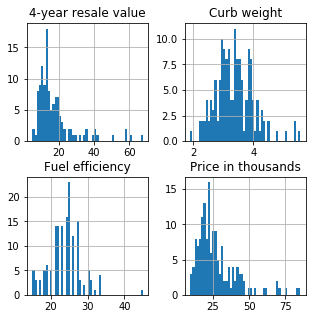

In [0]:
hist = df[NA_cols].hist(bins=50,figsize =(5,5))

After the numeric column fit Imputation

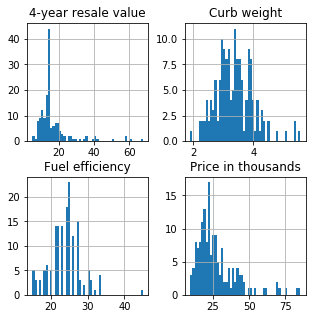

In [0]:
hist = dfn[NA_cols].hist(bins=50,figsize =(5, 5))

Impute NA's with categorical data columns. Compare the result to the original and the previously imputed dataframe.

In [0]:
file='https://drive.google.com/uc?export=download&id=1PigHCsGrqy8IP3NthEfOa95ly1Gbwp7D'
df=pd.read_csv(file)
df = df.drop(['Latest Launch'], axis =1)
dfo=df.select_dtypes(include=['object'])
fulldf = pd.concat([df.drop(dfo, axis=1), pd.get_dummies(dfo)], axis=1)
print(fulldf.shape)
imputer = imputer.fit(fulldf)
fulldfn = pd.DataFrame(imputer.transform(fulldf), columns = fulldf.columns)

(156, 202)


After All Features Fit Imputation

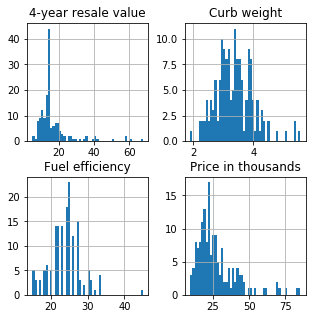

In [0]:
hist = fulldfn[NA_cols].hist(bins=50,figsize =(5,5))



---



### Data Types: Data Science Knowledge Question

Assuming the NA values have been handled appropriately. We now consider the different data types in our data frame.


1.   What types of data are in this data frame? 
2.   Can we use all data types as they are in our model building step?



In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 12 columns):
Manufacturer          156 non-null object
Model                 156 non-null object
Sales in thousands    156 non-null float64
Vehicle type          156 non-null object
Engine size           156 non-null float64
Horsepower            156 non-null int64
Wheelbase             156 non-null float64
Width                 156 non-null float64
Length                156 non-null float64
Fuel capacity         156 non-null float64
Latest Launch         156 non-null object
Region                156 non-null object
dtypes: float64(6), int64(1), object(5)
memory usage: 14.7+ KB


In [0]:
df.columns

Index(['Manufacturer', 'Model', 'Sales in thousands', 'Vehicle type',
       'Engine size', 'Horsepower', 'Wheelbase', 'Width', 'Length',
       'Fuel capacity', 'Latest Launch', 'Region'],
      dtype='object')